<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

# Noise Analysis Test

Imports

In [1]:
from qetpy import Noise
from qetpy.sim import TESnoise
from qetpy.plotting import compare_noise, plot_noise_sim
import numpy as np
import matplotlib.pyplot as plt

Load test data


In [2]:
pathToTraces = ''
traces_PT_on = np.load(pathToTraces+'traces.npy')


Create noise object


In [3]:
#savePath = 'example_Figs/' #used for test, user should define new path for test so they don't save over these figs
savePath = '' #user needs to define new path

sampleRate = 625e3 #define sample rate
channels = [ 'PCS1' , 'PES1' , 'PFS1' , 'PAS2' , 'PBS2' , 'PES2' , 'PDS2' ] #define the channel names
g124_noise = Noise(traces_PT_on, sampleRate, channels) #initialize a noise object
g124_noise.name = 'G124 SLAC Run 37 Pulse Tube On'



Calculate the PSD and corrCoeff

In [4]:
g124_noise.calculate_psd()
g124_noise.calculate_corrcoeff()
g124_noise.calculate_csd()



Calculate unCorrelated noise

In [5]:
g124_noise.calculate_uncorr_noise()


Test saving.

Uncomment to save and re-load

In [6]:
#saveName = pathToTraces + g124_noise.name.replace(" ", "_") + '.pkl'
#g124_noise.save(pathToTraces)

In [7]:
#del g124_noise

In [8]:
# with open(pathToTraces,'rb') as savefile:
#     g124_noise = pickle.load(savefile)

Test plotting of PSD and corrCoeff

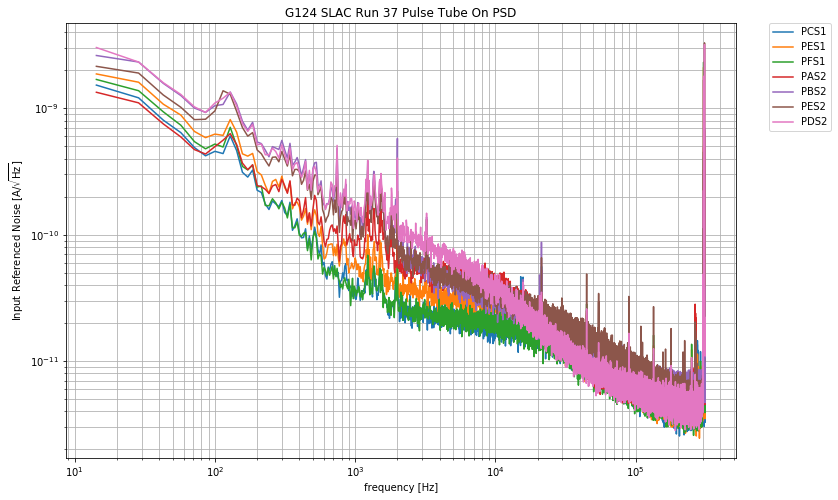

In [9]:
g124_noise.plot_psd(lgcoverlay=True)


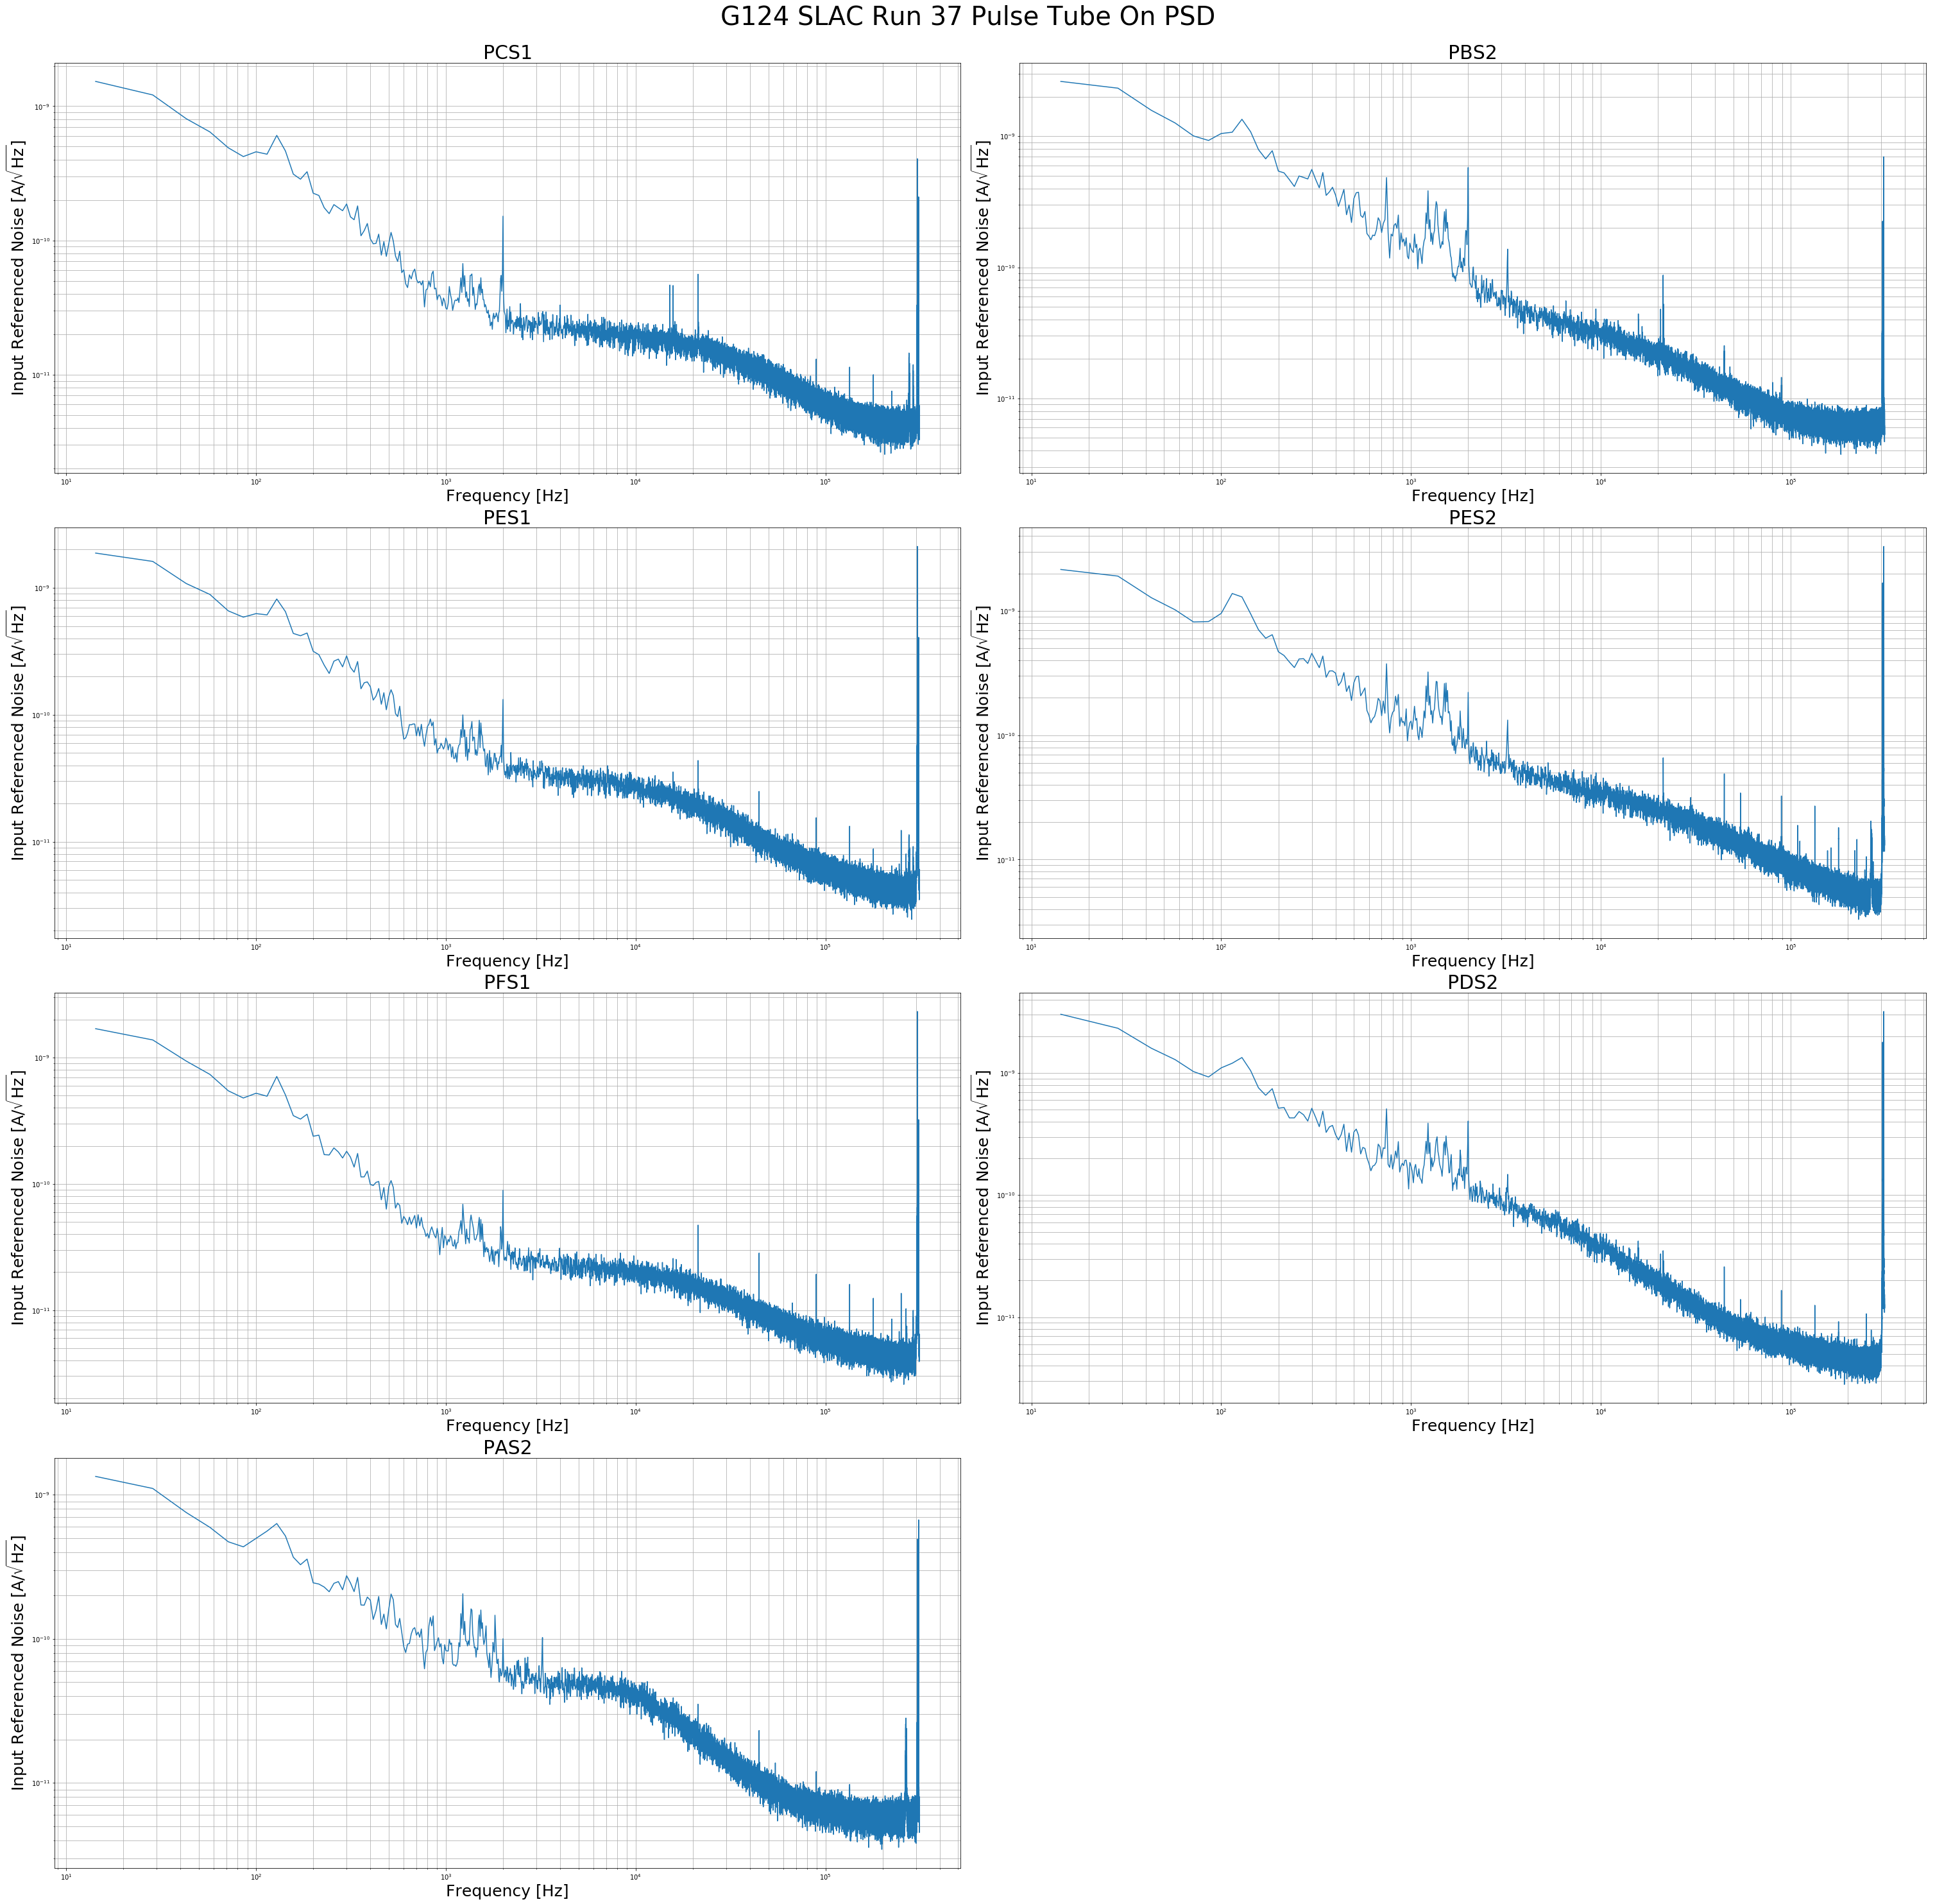

In [10]:

g124_noise.plot_psd(lgcoverlay=False)


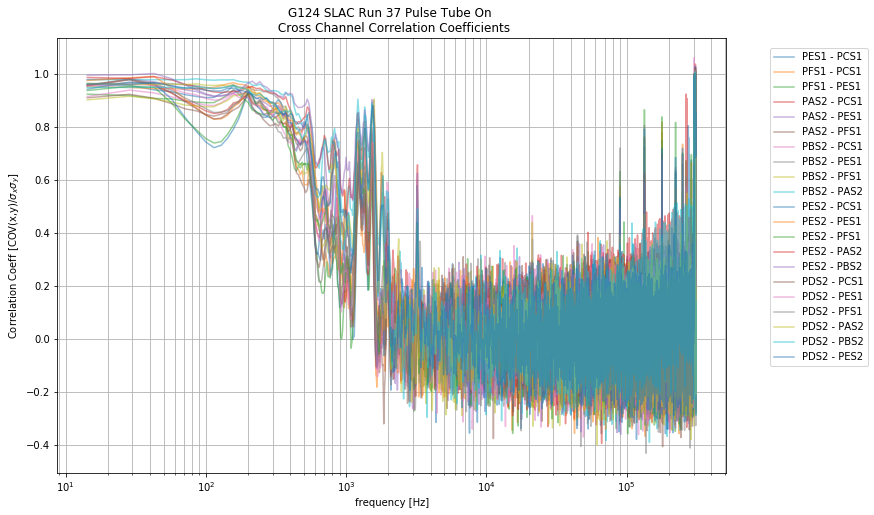

In [11]:
g124_noise.plot_corrcoeff(lgcsave=False, lgcsmooth=True, nwindow=13 )

Plot a few CSDs

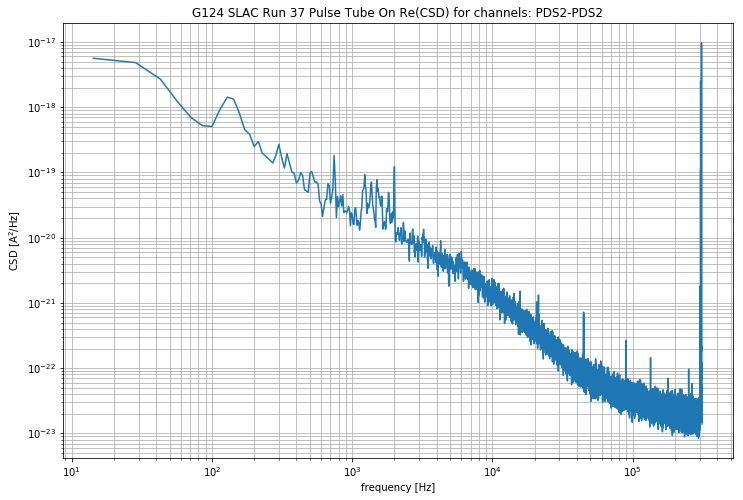

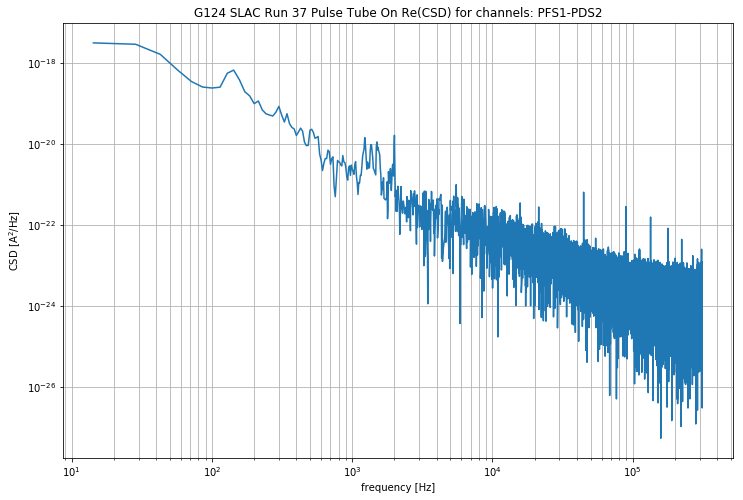

In [12]:
g124_noise.plot_csd(whichcsd=['66','26'])

Try to plot a CSD for a non existant channel

In [13]:
g124_noise.plot_csd(whichcsd=['68'])

index out of range


Try to save a figure with a bad path

Invalid save path. Figure not saved


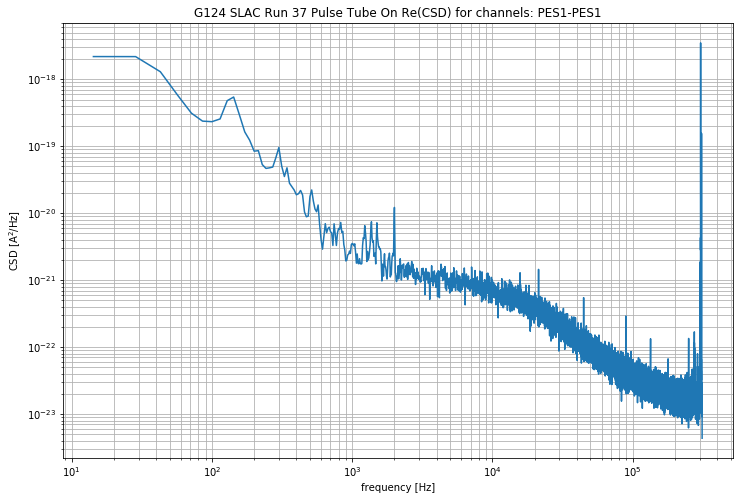

In [14]:
g124_noise.plot_csd(whichcsd=['11'], lgcsave=True, savepath = 'yay/python/is/great')

Plot Real vs Imaginary PSDs

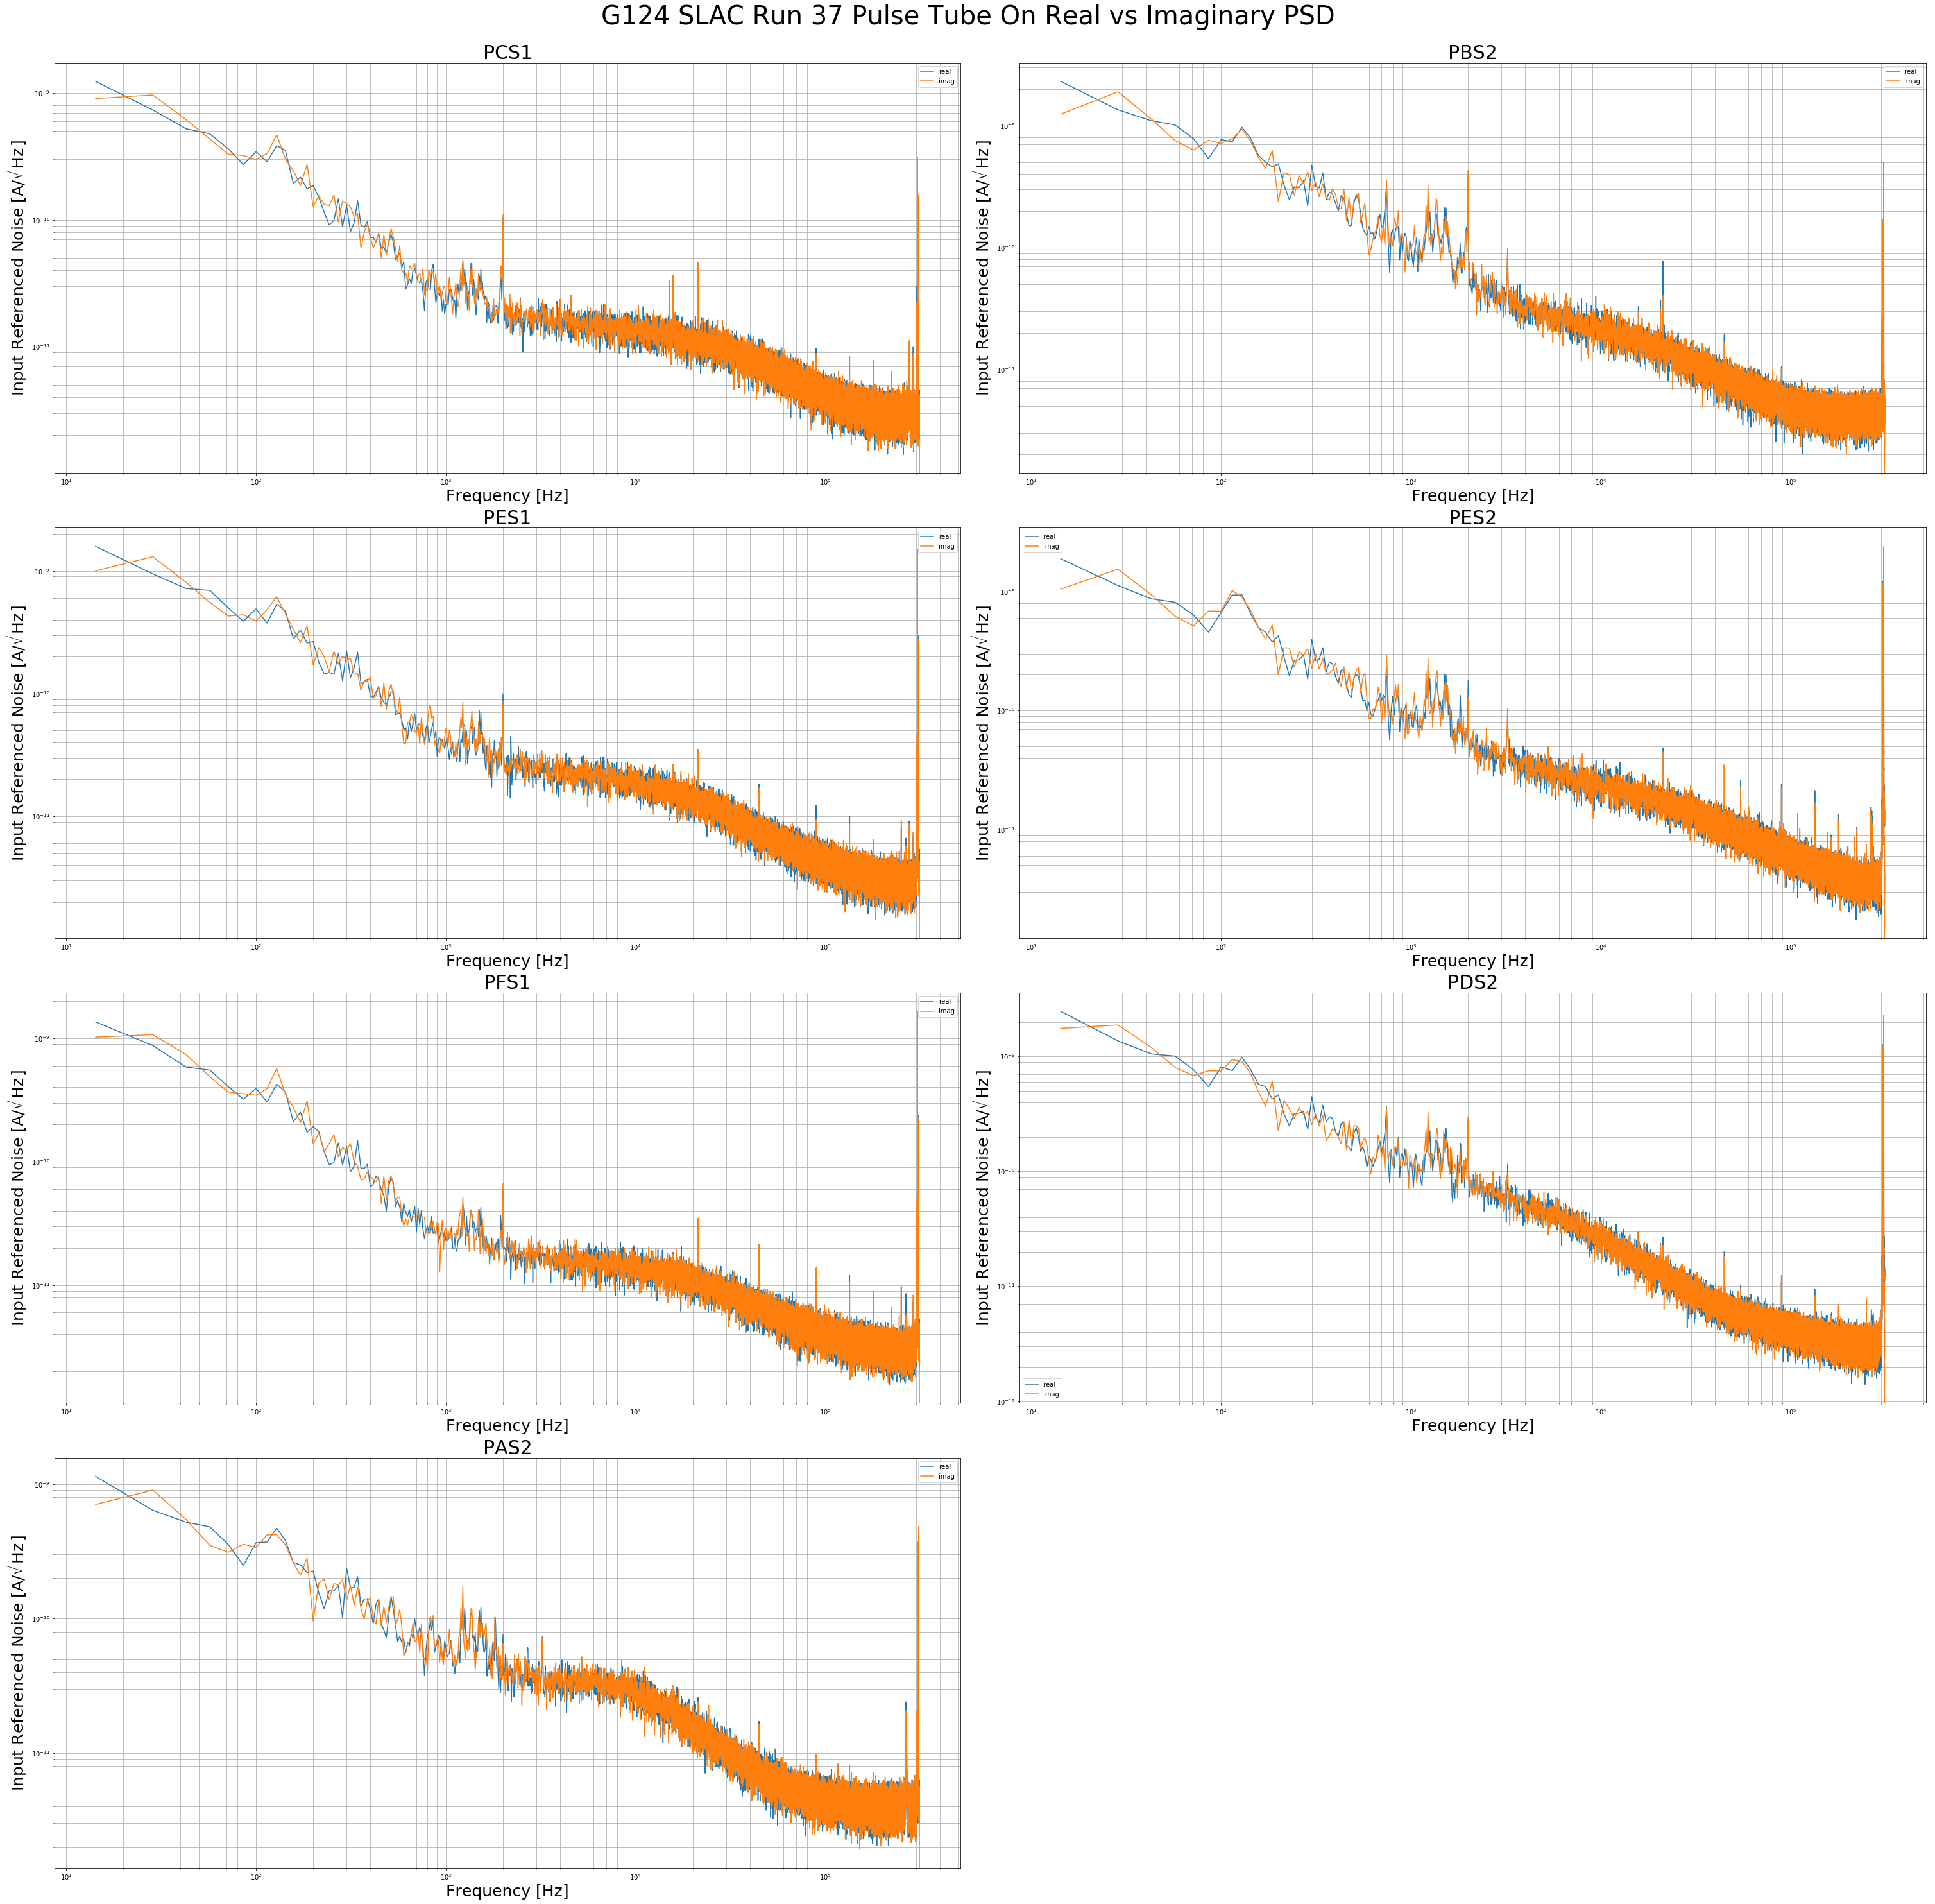

In [15]:
g124_noise.plot_reim_psd()

Plot unCorrelated part of the noise PSD

In [16]:
g124_noise.calculate_uncorr_noise()

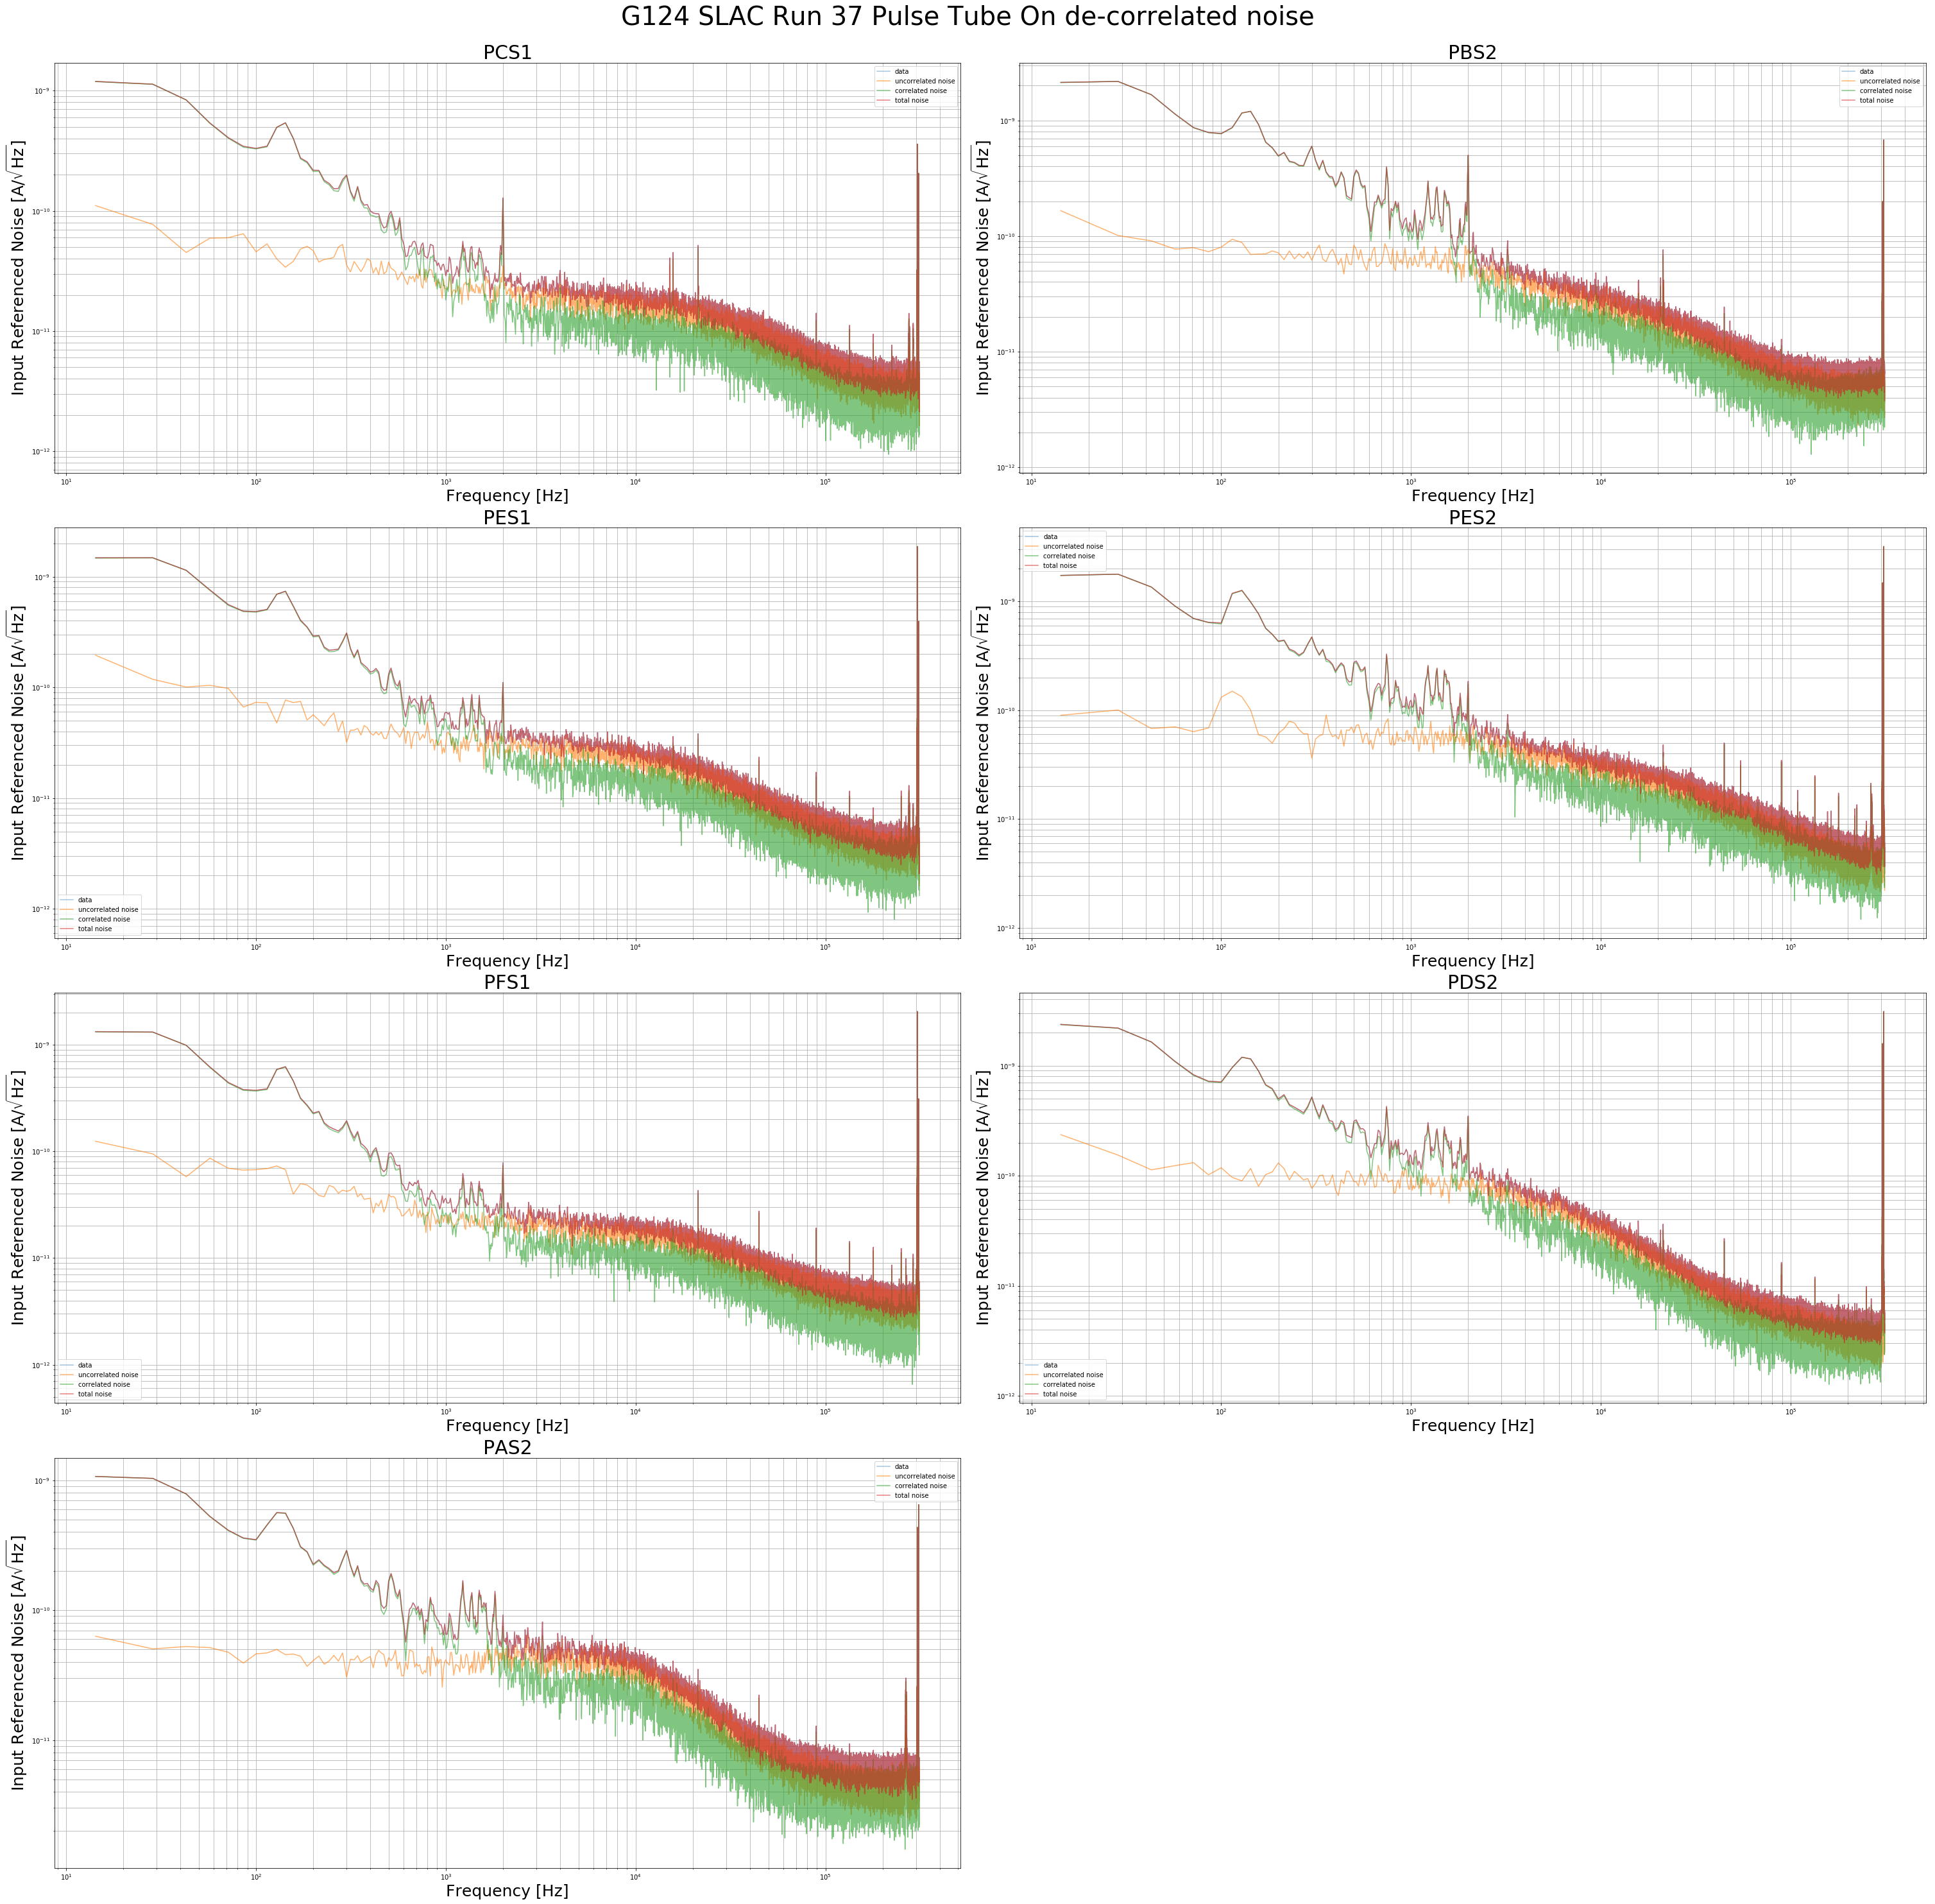

In [17]:

g124_noise.plot_decorrelatednoise(lgccorrelated=True,lgcsum = True, lgcsave=False)

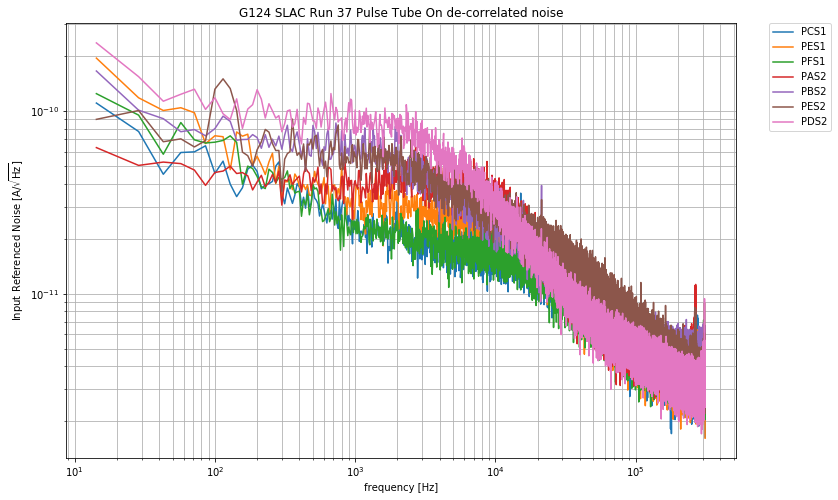

In [18]:
g124_noise.plot_decorrelatednoise(lgcoverlay = True)

Create noise simulation object

In [19]:

noise_sim = TESnoise(freqs = g124_noise.freqs[1:])

Note, these default noise parameters are completely made up, just for demostration

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8e4b5a4908>)

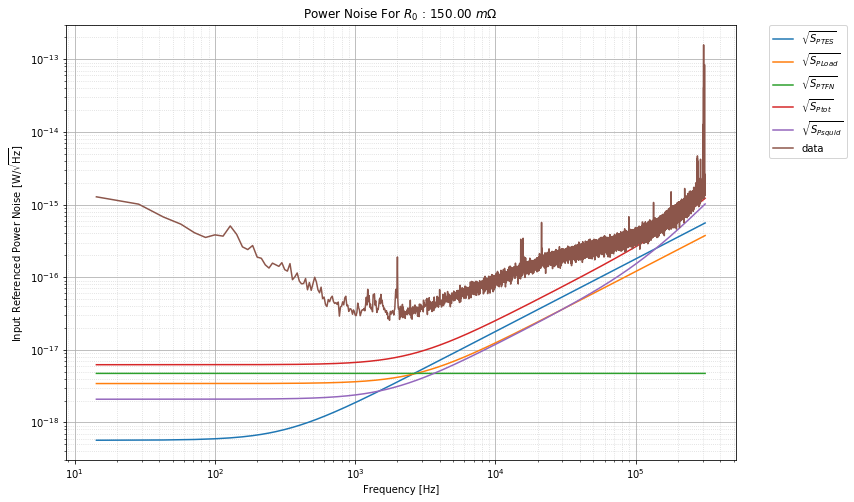

In [20]:
plot_noise_sim(g124_noise.freqs, g124_noise.psd[0,:], noise_sim, istype='power')